In [1]:
%matplotlib inline

import copy
from datetime import date
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import sys
import time
import torch as pt

sys.path.insert(0, '../..')

from function_space import Constant, Linear, DenseNet, NN, NN_Nik, SingleParam, MySequential
from problems import ExponentialOnBallNonlinearSin
from utilities import plot_moving_average, plot_loss_logs_extended, do_importance_sampling, do_importance_sampling_Wei, plot_control_for_DoubleWell1d, plot_loss_logs, plot_solution, save_exp_logs, load_exp_logs, compute_test_error
from solver import EllipticSolver

%load_ext autoreload
%autoreload 2

device = pt.device('cuda')

## delta t = 0.001, weight = 0_1

In [2]:
d = 10
L = 70000
print_every = 500
delta_t = 0.001

problem = ExponentialOnBallNonlinearSin(d=d)

models = [EllipticSolver(problem, 'Diffusion, N = %d' % N, seed=42, delta_t=delta_t, N=int(N), lr=0.001, L=L, K=200, K_test_log=10000,
          K_boundary=50, alpha=[0.1, 1.0], adaptive_forward_process=False, detach_forward=True,
          print_every=print_every, verbose=True, approx_method='Y', sample_center=False, loss_method='diffusion')
          for N in np.linspace(1, 4, 4)] + [EllipticSolver(problem, 'Diffusion, N = %d' % N, seed=42, delta_t=delta_t, N=int(N), lr=0.001, L=L, K=200, K_test_log=10000,
          K_boundary=50, alpha=[0.1, 1.0], adaptive_forward_process=False, detach_forward=True,
          print_every=print_every, verbose=True, approx_method='Y', sample_center=False, loss_method='diffusion')
          for N in np.linspace(5, 100, 20)]

In [29]:
for model in models:
    print(model.name)
    model.train()

Diffusion, N = 1
0 - loss = 1.9506e-04, v L2 error = 5.2125e-05, n = 0, active: 200/200, 0.01
500 - loss = 1.9635e-04, v L2 error = 5.6608e-05, n = 0, active: 200/200, 0.01
1000 - loss = 1.7841e-04, v L2 error = 6.3422e-05, n = 0, active: 200/200, 0.01
1500 - loss = 2.5819e-04, v L2 error = 5.6451e-05, n = 0, active: 200/200, 0.01
2000 - loss = 1.7266e-04, v L2 error = 5.1286e-05, n = 0, active: 200/200, 0.01
2500 - loss = 2.0005e-04, v L2 error = 5.5944e-05, n = 0, active: 200/200, 0.01
3000 - loss = 1.8841e-04, v L2 error = 6.0931e-05, n = 0, active: 200/200, 0.01
3500 - loss = 2.2205e-04, v L2 error = 5.6299e-05, n = 0, active: 200/200, 0.01
4000 - loss = 1.8275e-04, v L2 error = 4.7434e-05, n = 0, active: 200/200, 0.01
4500 - loss = 2.8085e-04, v L2 error = 4.9381e-05, n = 0, active: 200/200, 0.01
5000 - loss = 2.0037e-04, v L2 error = 5.8645e-05, n = 0, active: 200/200, 0.01
5500 - loss = 1.6607e-04, v L2 error = 5.4824e-05, n = 0, active: 200/200, 0.01
6000 - loss = 1.7824e-04, v

21000 - loss = 2.6913e-04, v L2 error = 9.4299e-06, n = 1, active: 200/200, 0.01
21500 - loss = 2.4643e-04, v L2 error = 1.0368e-05, n = 1, active: 200/200, 0.01
22000 - loss = 2.6195e-04, v L2 error = 1.1226e-05, n = 1, active: 200/200, 0.01
22500 - loss = 2.9137e-04, v L2 error = 9.5540e-06, n = 1, active: 200/200, 0.01
23000 - loss = 2.2891e-04, v L2 error = 9.6415e-06, n = 1, active: 200/200, 0.01
23500 - loss = 2.3647e-04, v L2 error = 8.9149e-06, n = 1, active: 200/200, 0.01
24000 - loss = 2.6198e-04, v L2 error = 8.9250e-06, n = 1, active: 200/200, 0.01
24500 - loss = 2.1198e-04, v L2 error = 7.5496e-06, n = 1, active: 200/200, 0.01
25000 - loss = 2.1190e-04, v L2 error = 8.8522e-06, n = 1, active: 200/200, 0.01
25500 - loss = 6.5170e-04, v L2 error = 1.2136e-05, n = 1, active: 200/200, 0.01
26000 - loss = 2.5332e-04, v L2 error = 7.4813e-06, n = 1, active: 200/200, 0.01
26500 - loss = 2.6388e-04, v L2 error = 7.4801e-06, n = 1, active: 200/200, 0.01
27000 - loss = 1.9868e-04, v

12000 - loss = 3.1455e-04, v L2 error = 2.2255e-06, n = 3, active: 143/200, 0.02
12500 - loss = 3.7563e-04, v L2 error = 3.7913e-06, n = 3, active: 140/200, 0.02
13000 - loss = 3.3133e-04, v L2 error = 4.2610e-06, n = 3, active: 139/200, 0.02
13500 - loss = 3.5854e-04, v L2 error = 2.3462e-06, n = 3, active: 132/200, 0.02
14000 - loss = 2.8739e-04, v L2 error = 3.1732e-06, n = 3, active: 145/200, 0.02
14500 - loss = 3.8052e-04, v L2 error = 3.2165e-06, n = 3, active: 146/200, 0.02
15000 - loss = 4.2943e-04, v L2 error = 3.0145e-06, n = 3, active: 141/200, 0.02
15500 - loss = 3.6963e-04, v L2 error = 4.0462e-06, n = 3, active: 144/200, 0.02
16000 - loss = 3.0401e-04, v L2 error = 5.7964e-06, n = 3, active: 136/200, 0.02
16500 - loss = 3.6463e-04, v L2 error = 4.2379e-06, n = 3, active: 152/200, 0.02
17000 - loss = 3.4530e-04, v L2 error = 3.7542e-06, n = 3, active: 136/200, 0.02
17500 - loss = 4.5228e-04, v L2 error = 2.9465e-06, n = 3, active: 150/200, 0.02
18000 - loss = 2.9459e-04, v

3000 - loss = 5.8125e-04, v L2 error = 5.7771e-06, n = 9, active: 81/200, 0.04
3500 - loss = 5.6912e-04, v L2 error = 8.7351e-06, n = 9, active: 78/200, 0.04
4000 - loss = 5.7317e-04, v L2 error = 6.3637e-06, n = 9, active: 69/200, 0.04
4500 - loss = 5.3956e-04, v L2 error = 6.1458e-06, n = 9, active: 78/200, 0.04
5000 - loss = 6.3659e-04, v L2 error = 9.8210e-06, n = 9, active: 77/200, 0.04
5500 - loss = 5.6161e-04, v L2 error = 5.6750e-06, n = 9, active: 74/200, 0.04
6000 - loss = 6.5905e-04, v L2 error = 7.3152e-06, n = 9, active: 80/200, 0.04
6500 - loss = 6.3002e-04, v L2 error = 8.6174e-06, n = 9, active: 81/200, 0.04
7000 - loss = 5.5845e-04, v L2 error = 8.3869e-06, n = 9, active: 83/200, 0.04
7500 - loss = 4.5316e-04, v L2 error = 7.6042e-06, n = 9, active: 80/200, 0.04
8000 - loss = 6.0477e-04, v L2 error = 5.6776e-06, n = 9, active: 80/200, 0.04
8500 - loss = 6.2376e-04, v L2 error = 5.8150e-06, n = 9, active: 63/200, 0.04
9000 - loss = 7.4264e-04, v L2 error = 6.7200e-06, n

24500 - loss = 6.1751e-04, v L2 error = 2.5274e-06, n = 14, active: 61/200, 0.05
25000 - loss = 5.2383e-04, v L2 error = 2.8067e-06, n = 14, active: 62/200, 0.05
25500 - loss = 6.3207e-04, v L2 error = 2.2317e-06, n = 14, active: 58/200, 0.05
26000 - loss = 7.2483e-04, v L2 error = 2.9509e-06, n = 14, active: 67/200, 0.05
26500 - loss = 6.3926e-04, v L2 error = 2.9234e-06, n = 14, active: 54/200, 0.05
27000 - loss = 5.3318e-04, v L2 error = 1.9626e-06, n = 14, active: 57/200, 0.05
27500 - loss = 6.3729e-04, v L2 error = 2.7625e-06, n = 14, active: 49/200, 0.05
28000 - loss = 7.3217e-04, v L2 error = 2.3402e-06, n = 14, active: 57/200, 0.05
28500 - loss = 4.9313e-04, v L2 error = 2.2019e-06, n = 14, active: 62/200, 0.05
29000 - loss = 7.3919e-04, v L2 error = 2.4541e-06, n = 14, active: 56/200, 0.05
29500 - loss = 5.5052e-04, v L2 error = 2.4351e-06, n = 14, active: 51/200, 0.05
Diffusion, N = 20
0 - loss = 5.5106e-04, v L2 error = 5.2547e-06, n = 19, active: 31/200, 0.07
500 - loss = 6

15500 - loss = 1.0093e-03, v L2 error = 5.0134e-06, n = 24, active: 28/200, 0.08
16000 - loss = 5.4393e-04, v L2 error = 2.2896e-06, n = 24, active: 29/200, 0.08
16500 - loss = 5.7142e-04, v L2 error = 2.1903e-06, n = 24, active: 19/200, 0.08
17000 - loss = 6.4124e-04, v L2 error = 2.2117e-06, n = 24, active: 31/200, 0.08
17500 - loss = 5.9604e-04, v L2 error = 2.6787e-06, n = 24, active: 27/200, 0.08
18000 - loss = 7.8897e-04, v L2 error = 2.7097e-06, n = 24, active: 26/200, 0.08
18500 - loss = 6.5162e-04, v L2 error = 2.5332e-06, n = 24, active: 24/200, 0.08
19000 - loss = 6.7303e-04, v L2 error = 2.3085e-06, n = 24, active: 30/200, 0.08
19500 - loss = 7.2930e-04, v L2 error = 1.8986e-06, n = 24, active: 22/200, 0.08
20000 - loss = 6.4514e-04, v L2 error = 2.4766e-06, n = 24, active: 33/200, 0.08
20500 - loss = 7.1536e-04, v L2 error = 2.1703e-06, n = 24, active: 22/200, 0.08
21000 - loss = 6.0017e-04, v L2 error = 2.1576e-06, n = 24, active: 23/200, 0.08
21500 - loss = 7.4411e-04, v

6500 - loss = 5.3405e-04, v L2 error = 1.3321e-06, n = 34, active: 9/200, 0.12
7000 - loss = 9.3127e-04, v L2 error = 1.8301e-06, n = 34, active: 15/200, 0.12
7500 - loss = 6.9217e-04, v L2 error = 1.2361e-06, n = 34, active: 17/200, 0.13
8000 - loss = 6.9438e-04, v L2 error = 1.0430e-06, n = 34, active: 16/200, 0.14
8500 - loss = 8.1657e-04, v L2 error = 1.3513e-06, n = 34, active: 16/200, 0.14
9000 - loss = 6.1020e-04, v L2 error = 8.9640e-07, n = 34, active: 8/200, 0.14
9500 - loss = 6.4832e-04, v L2 error = 8.5142e-07, n = 34, active: 11/200, 0.14
10000 - loss = 7.2568e-04, v L2 error = 1.3124e-06, n = 34, active: 7/200, 0.14
10500 - loss = 7.6458e-04, v L2 error = 1.6399e-06, n = 34, active: 13/200, 0.14
11000 - loss = 7.4424e-04, v L2 error = 1.0597e-06, n = 34, active: 20/200, 0.14
11500 - loss = 6.9691e-04, v L2 error = 1.1889e-06, n = 34, active: 18/200, 0.14
12000 - loss = 7.2189e-04, v L2 error = 9.5043e-07, n = 34, active: 8/200, 0.14
12500 - loss = 6.4986e-04, v L2 error =

27500 - loss = 8.6938e-04, v L2 error = 1.0550e-06, n = 39, active: 8/200, 0.15
28000 - loss = 8.0728e-04, v L2 error = 1.1736e-06, n = 39, active: 11/200, 0.15
28500 - loss = 7.6433e-04, v L2 error = 9.6411e-07, n = 39, active: 11/200, 0.15
29000 - loss = 6.7621e-04, v L2 error = 9.7477e-07, n = 39, active: 14/200, 0.15
29500 - loss = 7.2042e-04, v L2 error = 1.3440e-06, n = 39, active: 16/200, 0.15
Diffusion, N = 45
0 - loss = 7.0669e-04, v L2 error = 1.7974e-06, n = 44, active: 6/200, 0.15
500 - loss = 7.5368e-04, v L2 error = 1.4615e-06, n = 44, active: 10/200, 0.17
1000 - loss = 6.8470e-04, v L2 error = 1.1482e-06, n = 44, active: 7/200, 0.17
1500 - loss = 7.9397e-04, v L2 error = 1.4457e-06, n = 44, active: 8/200, 0.17
2000 - loss = 5.7778e-04, v L2 error = 8.4696e-07, n = 44, active: 9/200, 0.17
2500 - loss = 7.3326e-04, v L2 error = 8.9526e-07, n = 44, active: 9/200, 0.17
3000 - loss = 7.2495e-04, v L2 error = 7.8375e-07, n = 44, active: 6/200, 0.17
3500 - loss = 6.8587e-04, v 

19000 - loss = 6.6360e-04, v L2 error = 6.8107e-07, n = 49, active: 8/200, 0.19
19500 - loss = 5.2620e-04, v L2 error = 5.4348e-07, n = 49, active: 5/200, 0.19
20000 - loss = 9.0798e-04, v L2 error = 9.7075e-07, n = 49, active: 6/200, 0.19
20500 - loss = 6.5864e-04, v L2 error = 8.0716e-07, n = 49, active: 4/200, 0.19
21000 - loss = 6.2657e-04, v L2 error = 6.7793e-07, n = 49, active: 9/200, 0.19
21500 - loss = 7.1124e-04, v L2 error = 8.2179e-07, n = 49, active: 5/200, 0.19
22000 - loss = 6.7876e-04, v L2 error = 1.3187e-06, n = 49, active: 5/200, 0.19
22500 - loss = 7.2275e-04, v L2 error = 1.3285e-06, n = 49, active: 4/200, 0.19
23000 - loss = 7.8958e-04, v L2 error = 6.4714e-07, n = 49, active: 9/200, 0.19
23500 - loss = 5.4228e-04, v L2 error = 6.8355e-07, n = 49, active: 7/200, 0.19
24000 - loss = 5.5940e-04, v L2 error = 6.1738e-07, n = 49, active: 7/200, 0.19
24500 - loss = 8.5675e-04, v L2 error = 1.1879e-06, n = 49, active: 11/200, 0.19
25000 - loss = 6.3734e-04, v L2 error =

10500 - loss = 8.5472e-04, v L2 error = 1.2914e-06, n = 59, active: 3/200, 0.23
11000 - loss = 9.7167e-04, v L2 error = 9.7783e-07, n = 59, active: 6/200, 0.23
11500 - loss = 6.6709e-04, v L2 error = 7.9789e-07, n = 59, active: 4/200, 0.23
12000 - loss = 6.6989e-04, v L2 error = 1.0015e-06, n = 59, active: 4/200, 0.23
12500 - loss = 7.2109e-04, v L2 error = 1.4403e-06, n = 59, active: 5/200, 0.23
13000 - loss = 6.9597e-04, v L2 error = 9.0112e-07, n = 59, active: 4/200, 0.23
13500 - loss = 8.8730e-04, v L2 error = 7.3775e-07, n = 59, active: 1/200, 0.23
14000 - loss = 6.5024e-04, v L2 error = 8.6802e-07, n = 59, active: 3/200, 0.23
14500 - loss = 1.1482e-03, v L2 error = 8.7572e-07, n = 59, active: 2/200, 0.23
15000 - loss = 7.1346e-04, v L2 error = 9.1656e-07, n = 59, active: 2/200, 0.23
15500 - loss = 6.3338e-04, v L2 error = 1.1493e-06, n = 59, active: 4/200, 0.23
16000 - loss = 8.4165e-04, v L2 error = 7.6371e-07, n = 59, active: 3/200, 0.23
16500 - loss = 8.2640e-04, v L2 error = 

2000 - loss = 8.0710e-04, v L2 error = 1.8290e-06, n = 69, active: 3/200, 0.27
2500 - loss = 9.1324e-04, v L2 error = 1.1442e-06, n = 69, active: 2/200, 0.26
3000 - loss = 7.3860e-04, v L2 error = 1.3438e-06, n = 69, active: 2/200, 0.27
3500 - loss = 7.6784e-04, v L2 error = 1.0538e-06, n = 69, active: 2/200, 0.26
4000 - loss = 8.4665e-04, v L2 error = 1.4394e-06, n = 69, active: 1/200, 0.26
4500 - loss = 8.6481e-04, v L2 error = 1.6579e-06, n = 69, active: 1/200, 0.27
5000 - loss = 8.1155e-04, v L2 error = 1.1690e-06, n = 69, active: 2/200, 0.26
5500 - loss = 7.8651e-04, v L2 error = 1.2151e-06, n = 69, active: 2/200, 0.27
6000 - loss = 9.2744e-04, v L2 error = 9.8985e-07, n = 69, active: 2/200, 0.26
6500 - loss = 7.9608e-04, v L2 error = 1.7985e-06, n = 69, active: 6/200, 0.27
7000 - loss = 1.0321e-03, v L2 error = 1.1897e-06, n = 69, active: 2/200, 0.26
7500 - loss = 1.0737e-03, v L2 error = 2.2608e-06, n = 69, active: 2/200, 0.27
8000 - loss = 8.6260e-04, v L2 error = 1.0319e-06, n

23500 - loss = 9.2919e-04, v L2 error = 6.6929e-07, n = 74, active: 3/200, 0.28
24000 - loss = 6.4446e-04, v L2 error = 5.6404e-07, n = 70, active: 0/200, 0.28
24500 - loss = 7.0720e-04, v L2 error = 6.8873e-07, n = 74, active: 2/200, 0.28
25000 - loss = 7.7190e-04, v L2 error = 4.7370e-07, n = 74, active: 1/200, 0.28
25500 - loss = 8.3797e-04, v L2 error = 1.3508e-06, n = 74, active: 3/200, 0.28
26000 - loss = 6.3037e-04, v L2 error = 9.5689e-07, n = 64, active: 0/200, 0.28
26500 - loss = 8.2123e-04, v L2 error = 1.1121e-06, n = 74, active: 2/200, 0.28
27000 - loss = 6.7865e-04, v L2 error = 7.3979e-07, n = 74, active: 3/200, 0.28
27500 - loss = 9.4323e-04, v L2 error = 8.0175e-07, n = 74, active: 1/200, 0.28
28000 - loss = 5.9091e-04, v L2 error = 9.8289e-07, n = 74, active: 1/200, 0.28
28500 - loss = 9.2268e-04, v L2 error = 2.1093e-06, n = 74, active: 0/200, 0.28
29000 - loss = 6.5699e-04, v L2 error = 5.5967e-07, n = 74, active: 1/200, 0.28
29500 - loss = 8.6520e-04, v L2 error = 

15000 - loss = 6.1763e-04, v L2 error = 1.3025e-06, n = 80, active: 0/200, 0.31
15500 - loss = 6.4660e-04, v L2 error = 8.8210e-07, n = 84, active: 1/200, 0.31
16000 - loss = 6.2484e-04, v L2 error = 7.1843e-07, n = 84, active: 2/200, 0.31
16500 - loss = 1.1167e-03, v L2 error = 1.2749e-06, n = 84, active: 2/200, 0.31
17000 - loss = 7.9853e-04, v L2 error = 1.8596e-06, n = 71, active: 0/200, 0.31
17500 - loss = 9.3654e-04, v L2 error = 9.4749e-07, n = 84, active: 1/200, 0.31
18000 - loss = 8.6020e-04, v L2 error = 9.4561e-07, n = 84, active: 2/200, 0.31
18500 - loss = 8.2459e-04, v L2 error = 1.3157e-06, n = 84, active: 2/200, 0.31
19000 - loss = 9.5881e-04, v L2 error = 1.3262e-06, n = 84, active: 2/200, 0.31
19500 - loss = 6.5410e-04, v L2 error = 7.3206e-07, n = 82, active: 0/200, 0.31
20000 - loss = 8.3307e-04, v L2 error = 1.9064e-06, n = 84, active: 1/200, 0.31
20500 - loss = 8.5733e-04, v L2 error = 8.7834e-07, n = 84, active: 1/200, 0.31
21000 - loss = 7.2637e-04, v L2 error = 

7000 - loss = 8.0179e-04, v L2 error = 7.0004e-07, n = 94, active: 1/200, 0.34
7500 - loss = 8.9919e-04, v L2 error = 2.0929e-06, n = 94, active: 1/200, 0.34
8000 - loss = 6.9141e-04, v L2 error = 6.6240e-07, n = 80, active: 0/200, 0.34
8500 - loss = 8.6784e-04, v L2 error = 1.0258e-06, n = 71, active: 0/200, 0.34
9000 - loss = 8.2727e-04, v L2 error = 1.2077e-06, n = 71, active: 0/200, 0.33
9500 - loss = 7.3814e-04, v L2 error = 8.0098e-07, n = 94, active: 1/200, 0.34
10000 - loss = 7.5914e-04, v L2 error = 9.0904e-07, n = 78, active: 0/200, 0.34
10500 - loss = 9.7406e-04, v L2 error = 1.5656e-06, n = 94, active: 1/200, 0.34
11000 - loss = 7.3238e-04, v L2 error = 5.2383e-07, n = 88, active: 0/200, 0.34
11500 - loss = 8.4161e-04, v L2 error = 7.9792e-07, n = 94, active: 2/200, 0.33
12000 - loss = 8.6313e-04, v L2 error = 1.9774e-06, n = 90, active: 0/200, 0.33
12500 - loss = 8.1075e-04, v L2 error = 6.4030e-07, n = 94, active: 1/200, 0.33
13000 - loss = 7.5481e-04, v L2 error = 9.5486

28500 - loss = 8.2511e-04, v L2 error = 7.6053e-07, n = 63, active: 0/200, 0.35
29000 - loss = 1.1137e-03, v L2 error = 1.2533e-06, n = 99, active: 1/200, 0.35
29500 - loss = 8.7502e-04, v L2 error = 7.8661e-07, n = 85, active: 0/200, 0.35


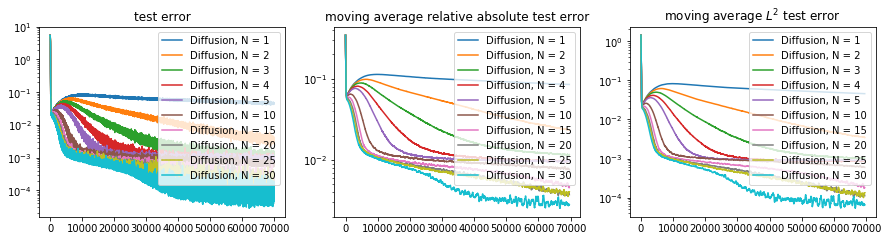

In [30]:
fig = plot_moving_average('Exponential on ball', models[:10])

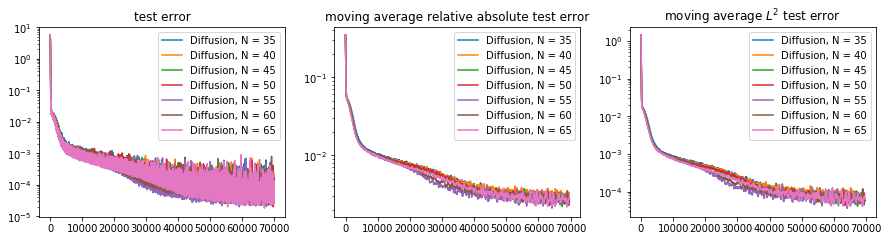

In [31]:
fig = plot_moving_average('Exponential on ball', models[10:17])

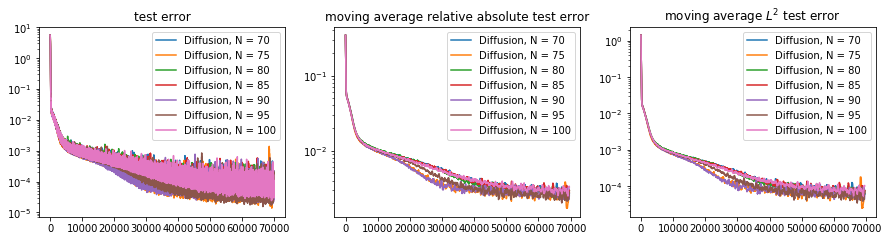

In [32]:
fig = plot_moving_average('Exponential on ball', models[17:])

In [34]:
test_losses = []
test_losses_2 = []

for model in models:
    test_losses.append(np.mean(model.V_test_L2[-200:]))
    test_losses_2.append(np.mean(model.V_test_L2[-400:]))

## delta t = 0.0005, weight = 0.1

In [3]:
d = 10
L = 60000
print_every = 500
delta_t = 0.0005

problem = ExponentialOnBallNonlinearSin(d=d)

models_05 = [EllipticSolver(problem, 'Diffusion, N = %d' % N, seed=42, delta_t=delta_t, N=int(N), lr=0.001, L=L, K=200, K_test_log=10000,
          K_boundary=50, alpha=[0.1, 1.0], adaptive_forward_process=False, detach_forward=True,
          print_every=print_every, verbose=True, approx_method='Y', sample_center=False, loss_method='diffusion')
          for N in np.linspace(1, 4, 4)] + [EllipticSolver(problem, 'Diffusion, N = %d' % N, seed=42, delta_t=delta_t, N=int(N), lr=0.001, L=L, K=200, K_test_log=10000,
          K_boundary=50, alpha=[0.1, 1.0], adaptive_forward_process=False, detach_forward=True,
          print_every=print_every, verbose=True, approx_method='Y', sample_center=False, loss_method='diffusion')
          for N in np.linspace(5, 100, 20)]

In [ ]:
for model in models_05:
    model.train()

0 - loss = 7.2378e+00, v L2 error = 2.8027e-03, n = 0, active: 200/200, 0.01
500 - loss = 4.3072e-03, v L2 error = 1.0510e-05, n = 0, active: 200/200, 0.01
1000 - loss = 3.9275e-03, v L2 error = 1.5182e-05, n = 0, active: 200/200, 0.01
1500 - loss = 1.2529e-03, v L2 error = 1.7000e-05, n = 0, active: 200/200, 0.01
2000 - loss = 6.8110e-04, v L2 error = 1.6933e-05, n = 0, active: 200/200, 0.01
2500 - loss = 8.7964e-04, v L2 error = 2.2378e-05, n = 0, active: 200/200, 0.01
3000 - loss = 5.9365e-04, v L2 error = 2.6641e-05, n = 0, active: 200/200, 0.01
3500 - loss = 3.7848e-04, v L2 error = 2.5774e-05, n = 0, active: 200/200, 0.01
4000 - loss = 2.6656e-04, v L2 error = 2.4611e-05, n = 0, active: 200/200, 0.01
4500 - loss = 2.3611e-04, v L2 error = 2.7644e-05, n = 0, active: 200/200, 0.01
5000 - loss = 3.5830e-04, v L2 error = 3.8562e-05, n = 0, active: 200/200, 0.01
5500 - loss = 1.8399e-04, v L2 error = 3.5229e-05, n = 0, active: 200/200, 0.01
6000 - loss = 1.4403e-04, v L2 error = 4.115

51000 - loss = 6.4701e-05, v L2 error = 5.0547e-05, n = 0, active: 200/200, 0.01
51500 - loss = 5.9037e-05, v L2 error = 5.3868e-05, n = 0, active: 200/200, 0.01
52000 - loss = 5.7545e-05, v L2 error = 5.1291e-05, n = 0, active: 200/200, 0.01
52500 - loss = 1.6624e-04, v L2 error = 4.8928e-05, n = 0, active: 200/200, 0.01
53000 - loss = 7.0972e-05, v L2 error = 5.3898e-05, n = 0, active: 200/200, 0.01
53500 - loss = 8.6230e-05, v L2 error = 4.6197e-05, n = 0, active: 200/200, 0.01
54000 - loss = 7.0725e-05, v L2 error = 4.3852e-05, n = 0, active: 200/200, 0.01
54500 - loss = 6.4721e-05, v L2 error = 4.2357e-05, n = 0, active: 200/200, 0.01
55000 - loss = 8.8094e-05, v L2 error = 5.0243e-05, n = 0, active: 200/200, 0.01
55500 - loss = 6.7663e-05, v L2 error = 4.9636e-05, n = 0, active: 200/200, 0.01
56000 - loss = 8.4215e-05, v L2 error = 4.4287e-05, n = 0, active: 200/200, 0.01
56500 - loss = 7.5072e-05, v L2 error = 4.7194e-05, n = 0, active: 200/200, 0.01
57000 - loss = 6.8649e-05, v

42000 - loss = 2.1461e-04, v L2 error = 5.5989e-05, n = 1, active: 200/200, 0.01
42500 - loss = 1.7836e-04, v L2 error = 5.7973e-05, n = 1, active: 200/200, 0.01
43000 - loss = 1.5305e-04, v L2 error = 5.7907e-05, n = 1, active: 200/200, 0.01
43500 - loss = 2.4398e-04, v L2 error = 5.6573e-05, n = 1, active: 200/200, 0.01
44000 - loss = 1.5129e-04, v L2 error = 5.4406e-05, n = 1, active: 200/200, 0.01
44500 - loss = 1.8076e-04, v L2 error = 5.8831e-05, n = 1, active: 200/200, 0.01
45000 - loss = 1.8145e-04, v L2 error = 5.2686e-05, n = 1, active: 200/200, 0.01
45500 - loss = 1.6856e-04, v L2 error = 5.8089e-05, n = 1, active: 200/200, 0.01
46000 - loss = 1.6977e-04, v L2 error = 5.0399e-05, n = 1, active: 200/200, 0.01
46500 - loss = 1.6416e-04, v L2 error = 6.3952e-05, n = 1, active: 200/200, 0.01
47000 - loss = 1.8409e-04, v L2 error = 6.1570e-05, n = 1, active: 200/200, 0.01
47500 - loss = 2.3783e-04, v L2 error = 5.6124e-05, n = 1, active: 200/200, 0.01
48000 - loss = 1.5312e-04, v

33000 - loss = 2.4619e-04, v L2 error = 5.3545e-05, n = 2, active: 172/200, 0.02
33500 - loss = 2.3632e-04, v L2 error = 4.6416e-05, n = 2, active: 174/200, 0.02
34000 - loss = 3.9682e-04, v L2 error = 5.2564e-05, n = 2, active: 173/200, 0.02
34500 - loss = 3.1969e-04, v L2 error = 5.7027e-05, n = 2, active: 179/200, 0.02
35000 - loss = 2.7274e-04, v L2 error = 5.6930e-05, n = 2, active: 168/200, 0.02
35500 - loss = 3.3143e-04, v L2 error = 5.6680e-05, n = 2, active: 178/200, 0.02
36000 - loss = 3.0239e-04, v L2 error = 4.9686e-05, n = 2, active: 174/200, 0.02
36500 - loss = 2.4502e-04, v L2 error = 4.6232e-05, n = 2, active: 175/200, 0.02
37000 - loss = 3.8192e-04, v L2 error = 5.4968e-05, n = 2, active: 173/200, 0.02
37500 - loss = 2.6654e-04, v L2 error = 5.0341e-05, n = 2, active: 178/200, 0.02
38000 - loss = 2.4299e-04, v L2 error = 4.9297e-05, n = 2, active: 174/200, 0.02
38500 - loss = 2.4792e-04, v L2 error = 5.4189e-05, n = 2, active: 173/200, 0.02
39000 - loss = 2.8571e-04, v

24000 - loss = 3.2179e-04, v L2 error = 4.8223e-05, n = 3, active: 160/200, 0.02
24500 - loss = 3.7144e-04, v L2 error = 3.8463e-05, n = 3, active: 150/200, 0.02
25000 - loss = 3.2290e-04, v L2 error = 4.0261e-05, n = 3, active: 155/200, 0.02
25500 - loss = 3.7184e-04, v L2 error = 4.2030e-05, n = 3, active: 163/200, 0.02
26000 - loss = 2.9612e-04, v L2 error = 3.9367e-05, n = 3, active: 166/200, 0.02
26500 - loss = 3.1680e-04, v L2 error = 4.0901e-05, n = 3, active: 165/200, 0.02
27000 - loss = 4.6405e-04, v L2 error = 4.4433e-05, n = 3, active: 163/200, 0.02
27500 - loss = 3.0759e-04, v L2 error = 3.9238e-05, n = 3, active: 154/200, 0.02
28000 - loss = 6.3401e-04, v L2 error = 4.2508e-05, n = 3, active: 159/200, 0.02
28500 - loss = 3.4647e-04, v L2 error = 3.5693e-05, n = 3, active: 163/200, 0.02
29000 - loss = 3.4471e-04, v L2 error = 3.0869e-05, n = 3, active: 164/200, 0.02
29500 - loss = 2.8640e-04, v L2 error = 3.6137e-05, n = 3, active: 157/200, 0.02
30000 - loss = 3.1376e-04, v

15000 - loss = 4.8005e-04, v L2 error = 5.4286e-05, n = 4, active: 147/200, 0.02
15500 - loss = 3.9544e-04, v L2 error = 4.8449e-05, n = 4, active: 140/200, 0.02
16000 - loss = 4.8419e-04, v L2 error = 5.0999e-05, n = 4, active: 143/200, 0.02
16500 - loss = 4.4849e-04, v L2 error = 4.1402e-05, n = 4, active: 143/200, 0.02
17000 - loss = 4.0021e-04, v L2 error = 4.1786e-05, n = 4, active: 144/200, 0.02
17500 - loss = 4.6999e-04, v L2 error = 4.1114e-05, n = 4, active: 151/200, 0.02
18000 - loss = 4.5542e-04, v L2 error = 3.6511e-05, n = 4, active: 143/200, 0.02
18500 - loss = 6.8494e-04, v L2 error = 3.6364e-05, n = 4, active: 131/200, 0.02
19000 - loss = 3.8331e-04, v L2 error = 3.5577e-05, n = 4, active: 150/200, 0.02
19500 - loss = 4.3652e-04, v L2 error = 3.1787e-05, n = 4, active: 148/200, 0.02
20000 - loss = 4.4459e-04, v L2 error = 2.6376e-05, n = 4, active: 148/200, 0.02
20500 - loss = 4.1812e-04, v L2 error = 3.1074e-05, n = 4, active: 145/200, 0.02
21000 - loss = 3.5161e-04, v

6000 - loss = 1.5777e-03, v L2 error = 1.2452e-04, n = 9, active: 107/200, 0.04
6500 - loss = 1.3162e-03, v L2 error = 1.1120e-04, n = 9, active: 105/200, 0.04
7000 - loss = 1.4842e-03, v L2 error = 1.1554e-04, n = 9, active: 106/200, 0.04
7500 - loss = 1.2994e-03, v L2 error = 8.6697e-05, n = 9, active: 111/200, 0.04
8000 - loss = 1.1715e-03, v L2 error = 8.4163e-05, n = 9, active: 110/200, 0.04
8500 - loss = 1.2868e-03, v L2 error = 6.7146e-05, n = 9, active: 98/200, 0.04
9000 - loss = 9.8362e-04, v L2 error = 5.4562e-05, n = 9, active: 103/200, 0.04
9500 - loss = 1.1529e-03, v L2 error = 4.9114e-05, n = 9, active: 114/200, 0.04
10000 - loss = 8.3268e-04, v L2 error = 4.1973e-05, n = 9, active: 100/200, 0.04
10500 - loss = 8.7852e-04, v L2 error = 3.1573e-05, n = 9, active: 98/200, 0.04
11000 - loss = 9.0958e-04, v L2 error = 3.2279e-05, n = 9, active: 100/200, 0.04
11500 - loss = 8.6624e-04, v L2 error = 2.3124e-05, n = 9, active: 106/200, 0.04
12000 - loss = 8.6761e-04, v L2 error 

57000 - loss = 2.5888e-04, v L2 error = 4.5276e-06, n = 9, active: 109/200, 0.04
57500 - loss = 3.3948e-04, v L2 error = 3.9627e-06, n = 9, active: 99/200, 0.04
58000 - loss = 3.1038e-04, v L2 error = 3.6788e-06, n = 9, active: 112/200, 0.04
58500 - loss = 2.4648e-04, v L2 error = 4.5519e-06, n = 9, active: 112/200, 0.04
59000 - loss = 2.6314e-04, v L2 error = 5.0347e-06, n = 9, active: 120/200, 0.04
59500 - loss = 3.4772e-04, v L2 error = 4.4886e-06, n = 9, active: 117/200, 0.04
0 - loss = 7.2520e+00, v L2 error = 2.4629e-02, n = 14, active: 81/200, 0.06
500 - loss = 5.6507e-03, v L2 error = 1.4043e-04, n = 14, active: 80/200, 0.05
1000 - loss = 4.6544e-03, v L2 error = 1.4362e-04, n = 14, active: 85/200, 0.05
1500 - loss = 3.4200e-03, v L2 error = 1.5412e-04, n = 14, active: 72/200, 0.05
2000 - loss = 3.5901e-03, v L2 error = 2.0795e-04, n = 14, active: 99/200, 0.05
2500 - loss = 2.9011e-03, v L2 error = 2.4279e-04, n = 14, active: 83/200, 0.05
3000 - loss = 2.8986e-03, v L2 error = 

48000 - loss = 2.9384e-04, v L2 error = 5.1927e-06, n = 14, active: 81/200, 0.05
48500 - loss = 4.9131e-04, v L2 error = 4.6180e-06, n = 14, active: 79/200, 0.05
49000 - loss = 3.3765e-04, v L2 error = 8.8081e-06, n = 14, active: 82/200, 0.05
49500 - loss = 4.7547e-04, v L2 error = 7.3222e-06, n = 14, active: 85/200, 0.05
50000 - loss = 2.6845e-04, v L2 error = 6.5148e-06, n = 14, active: 82/200, 0.05
50500 - loss = 3.4108e-04, v L2 error = 3.0168e-06, n = 14, active: 83/200, 0.05
51000 - loss = 4.3973e-04, v L2 error = 8.1254e-06, n = 14, active: 90/200, 0.05
51500 - loss = 2.9117e-04, v L2 error = 4.9051e-06, n = 14, active: 94/200, 0.05
52000 - loss = 2.7396e-04, v L2 error = 3.7215e-06, n = 14, active: 68/200, 0.05
52500 - loss = 2.5577e-04, v L2 error = 5.7876e-06, n = 14, active: 84/200, 0.05
53000 - loss = 2.9691e-04, v L2 error = 6.2726e-06, n = 14, active: 92/200, 0.05
53500 - loss = 4.9508e-04, v L2 error = 6.4263e-06, n = 14, active: 74/200, 0.05
54000 - loss = 2.6464e-04, v

40000 - loss = 3.7197e-04, v L2 error = 5.1306e-06, n = 19, active: 66/200, 0.07
40500 - loss = 3.3870e-04, v L2 error = 5.5738e-06, n = 19, active: 66/200, 0.07
41000 - loss = 3.9113e-04, v L2 error = 8.9672e-06, n = 19, active: 65/200, 0.07
41500 - loss = 3.7266e-04, v L2 error = 8.1476e-06, n = 19, active: 76/200, 0.07
42000 - loss = 3.9019e-04, v L2 error = 7.7687e-06, n = 19, active: 68/200, 0.07
42500 - loss = 4.0805e-04, v L2 error = 7.7906e-06, n = 19, active: 57/200, 0.07
43000 - loss = 3.9895e-04, v L2 error = 4.7088e-06, n = 19, active: 66/200, 0.07
43500 - loss = 3.3444e-04, v L2 error = 4.9392e-06, n = 19, active: 57/200, 0.07
44000 - loss = 3.6447e-04, v L2 error = 5.4333e-06, n = 19, active: 69/200, 0.07
44500 - loss = 3.9570e-04, v L2 error = 7.5128e-06, n = 19, active: 74/200, 0.07
45000 - loss = 3.1111e-04, v L2 error = 6.9811e-06, n = 19, active: 72/200, 0.07
45500 - loss = 3.4410e-04, v L2 error = 5.3792e-06, n = 19, active: 73/200, 0.07
46000 - loss = 3.7725e-04, v

31000 - loss = 4.5677e-04, v L2 error = 6.5253e-06, n = 24, active: 46/200, 0.08
31500 - loss = 3.3780e-04, v L2 error = 5.5672e-06, n = 24, active: 48/200, 0.08
32000 - loss = 5.1279e-04, v L2 error = 6.5442e-06, n = 24, active: 58/200, 0.08
32500 - loss = 5.0904e-04, v L2 error = 1.0969e-05, n = 24, active: 56/200, 0.08
33000 - loss = 5.8627e-04, v L2 error = 1.2983e-05, n = 24, active: 64/200, 0.08
33500 - loss = 5.0334e-04, v L2 error = 4.8378e-06, n = 24, active: 47/200, 0.08
34000 - loss = 6.5846e-04, v L2 error = 9.8534e-06, n = 24, active: 64/200, 0.08
34500 - loss = 4.0590e-04, v L2 error = 6.3920e-06, n = 24, active: 60/200, 0.08
35000 - loss = 4.9515e-04, v L2 error = 6.1023e-06, n = 24, active: 50/200, 0.08
35500 - loss = 5.7480e-04, v L2 error = 1.0931e-05, n = 24, active: 54/200, 0.08
36000 - loss = 4.3316e-04, v L2 error = 8.3949e-06, n = 24, active: 55/200, 0.08
36500 - loss = 4.2995e-04, v L2 error = 6.9463e-06, n = 24, active: 44/200, 0.08
37000 - loss = 4.7033e-04, v

22000 - loss = 7.4214e-04, v L2 error = 7.5839e-06, n = 29, active: 45/200, 0.10
22500 - loss = 5.2738e-04, v L2 error = 6.9566e-06, n = 29, active: 49/200, 0.10
23000 - loss = 5.5054e-04, v L2 error = 6.3018e-06, n = 29, active: 41/200, 0.10
23500 - loss = 4.8564e-04, v L2 error = 1.0019e-05, n = 29, active: 52/200, 0.10
24000 - loss = 5.3540e-04, v L2 error = 1.3549e-05, n = 29, active: 57/200, 0.10
24500 - loss = 5.1847e-04, v L2 error = 5.9917e-06, n = 29, active: 41/200, 0.10
25000 - loss = 6.3282e-04, v L2 error = 8.8910e-06, n = 29, active: 50/200, 0.10
25500 - loss = 5.4815e-04, v L2 error = 1.0190e-05, n = 29, active: 46/200, 0.10
26000 - loss = 4.8988e-04, v L2 error = 7.8263e-06, n = 29, active: 45/200, 0.10
26500 - loss = 5.4494e-04, v L2 error = 1.3794e-05, n = 29, active: 52/200, 0.10
27000 - loss = 6.8538e-04, v L2 error = 9.4360e-06, n = 29, active: 61/200, 0.10
27500 - loss = 5.8015e-04, v L2 error = 9.4445e-06, n = 29, active: 51/200, 0.10
28000 - loss = 5.8431e-04, v

13000 - loss = 1.0338e-03, v L2 error = 1.6320e-05, n = 34, active: 39/200, 0.12
13500 - loss = 8.9183e-04, v L2 error = 1.3282e-05, n = 34, active: 45/200, 0.12
14000 - loss = 7.4923e-04, v L2 error = 9.5064e-06, n = 34, active: 45/200, 0.12
14500 - loss = 7.9887e-04, v L2 error = 1.1243e-05, n = 34, active: 40/200, 0.12
15000 - loss = 6.3843e-04, v L2 error = 9.6797e-06, n = 34, active: 35/200, 0.12
15500 - loss = 6.7221e-04, v L2 error = 1.0344e-05, n = 34, active: 38/200, 0.12
16000 - loss = 7.4405e-04, v L2 error = 1.3696e-05, n = 34, active: 40/200, 0.12
16500 - loss = 1.0175e-03, v L2 error = 1.6565e-05, n = 34, active: 35/200, 0.12
17000 - loss = 7.9019e-04, v L2 error = 8.6235e-06, n = 34, active: 30/200, 0.12
17500 - loss = 6.1963e-04, v L2 error = 1.1563e-05, n = 34, active: 43/200, 0.12
18000 - loss = 7.1814e-04, v L2 error = 8.4073e-06, n = 34, active: 45/200, 0.12
18500 - loss = 6.0583e-04, v L2 error = 9.6146e-06, n = 34, active: 35/200, 0.12
19000 - loss = 7.8164e-04, v

4000 - loss = 3.1742e-03, v L2 error = 4.3779e-05, n = 39, active: 39/200, 0.13
4500 - loss = 1.6659e-03, v L2 error = 2.1971e-05, n = 39, active: 30/200, 0.13
5000 - loss = 1.5934e-03, v L2 error = 2.1438e-05, n = 39, active: 48/200, 0.13
5500 - loss = 1.4915e-03, v L2 error = 1.6075e-05, n = 39, active: 33/200, 0.13
6000 - loss = 1.4235e-03, v L2 error = 1.5208e-05, n = 39, active: 23/200, 0.13
6500 - loss = 1.4264e-03, v L2 error = 1.8390e-05, n = 39, active: 41/200, 0.13
7000 - loss = 1.1618e-03, v L2 error = 1.4300e-05, n = 39, active: 39/200, 0.13
7500 - loss = 1.2201e-03, v L2 error = 1.1351e-05, n = 39, active: 29/200, 0.14
8000 - loss = 1.0345e-03, v L2 error = 8.8159e-06, n = 39, active: 27/200, 0.13
8500 - loss = 1.1848e-03, v L2 error = 1.4508e-05, n = 39, active: 36/200, 0.13
9000 - loss = 1.0750e-03, v L2 error = 1.6499e-05, n = 39, active: 36/200, 0.14
9500 - loss = 9.2793e-04, v L2 error = 1.1608e-05, n = 39, active: 33/200, 0.14
10000 - loss = 9.2452e-04, v L2 error = 

55500 - loss = 3.6072e-04, v L2 error = 1.0362e-06, n = 39, active: 37/200, 0.14
56000 - loss = 3.1926e-04, v L2 error = 1.4540e-06, n = 39, active: 38/200, 0.14
56500 - loss = 3.0791e-04, v L2 error = 8.3917e-07, n = 39, active: 35/200, 0.14
57000 - loss = 4.6661e-04, v L2 error = 1.5108e-06, n = 39, active: 39/200, 0.14
57500 - loss = 4.0474e-04, v L2 error = 1.3707e-06, n = 39, active: 40/200, 0.14
58000 - loss = 3.0879e-04, v L2 error = 1.1147e-06, n = 39, active: 41/200, 0.14
58500 - loss = 3.2166e-04, v L2 error = 1.1534e-06, n = 39, active: 25/200, 0.14
59000 - loss = 2.9065e-04, v L2 error = 9.5851e-07, n = 39, active: 28/200, 0.14
59500 - loss = 3.0435e-04, v L2 error = 1.1093e-06, n = 39, active: 29/200, 0.14
0 - loss = 7.2520e+00, v L2 error = 3.9789e-02, n = 44, active: 23/200, 0.16
500 - loss = 7.9557e-03, v L2 error = 2.2742e-04, n = 44, active: 28/200, 0.15
1000 - loss = 8.3551e-03, v L2 error = 2.1649e-04, n = 44, active: 23/200, 0.15
1500 - loss = 8.0906e-03, v L2 erro

46500 - loss = 3.5598e-04, v L2 error = 2.0332e-06, n = 44, active: 22/200, 0.15
47000 - loss = 4.2612e-04, v L2 error = 3.5233e-06, n = 44, active: 28/200, 0.15
47500 - loss = 4.0742e-04, v L2 error = 2.3634e-06, n = 44, active: 24/200, 0.15
48000 - loss = 4.9197e-04, v L2 error = 3.0236e-06, n = 44, active: 26/200, 0.15
48500 - loss = 4.0305e-04, v L2 error = 2.0837e-06, n = 44, active: 22/200, 0.15
49000 - loss = 2.7013e-04, v L2 error = 1.2397e-06, n = 44, active: 20/200, 0.15
49500 - loss = 4.4284e-04, v L2 error = 2.5915e-06, n = 44, active: 37/200, 0.15
50000 - loss = 3.7852e-04, v L2 error = 2.6460e-06, n = 44, active: 31/200, 0.15
50500 - loss = 4.2609e-04, v L2 error = 2.0776e-06, n = 44, active: 27/200, 0.15
51000 - loss = 3.9250e-04, v L2 error = 1.3323e-06, n = 44, active: 19/200, 0.15
51500 - loss = 3.6142e-04, v L2 error = 1.4174e-06, n = 44, active: 24/200, 0.15
52000 - loss = 3.8718e-04, v L2 error = 1.8227e-06, n = 44, active: 34/200, 0.15
52500 - loss = 3.4792e-04, v

37500 - loss = 3.8688e-04, v L2 error = 4.1141e-06, n = 49, active: 27/200, 0.17
38000 - loss = 4.7964e-04, v L2 error = 4.6895e-06, n = 49, active: 24/200, 0.17
38500 - loss = 5.3232e-04, v L2 error = 4.4661e-06, n = 49, active: 24/200, 0.17
39000 - loss = 4.0236e-04, v L2 error = 3.2567e-06, n = 49, active: 21/200, 0.17
39500 - loss = 5.2315e-04, v L2 error = 3.4625e-06, n = 49, active: 28/200, 0.17
40000 - loss = 4.1279e-04, v L2 error = 3.3096e-06, n = 49, active: 26/200, 0.17
40500 - loss = 3.4438e-04, v L2 error = 3.2395e-06, n = 49, active: 21/200, 0.17
41000 - loss = 4.8078e-04, v L2 error = 3.9787e-06, n = 49, active: 25/200, 0.17
41500 - loss = 5.1933e-04, v L2 error = 3.5518e-06, n = 49, active: 29/200, 0.17
42000 - loss = 4.8868e-04, v L2 error = 2.9136e-06, n = 49, active: 24/200, 0.17
42500 - loss = 4.8814e-04, v L2 error = 4.3130e-06, n = 49, active: 31/200, 0.17
43000 - loss = 4.7373e-04, v L2 error = 2.8241e-06, n = 49, active: 29/200, 0.17
43500 - loss = 4.3837e-04, v

28500 - loss = 3.8816e-04, v L2 error = 4.6192e-06, n = 54, active: 23/200, 0.19
29000 - loss = 3.5866e-04, v L2 error = 5.7472e-06, n = 54, active: 17/200, 0.19
29500 - loss = 4.1520e-04, v L2 error = 3.4234e-06, n = 54, active: 16/200, 0.19
30000 - loss = 6.9445e-04, v L2 error = 7.6458e-06, n = 54, active: 25/200, 0.19
30500 - loss = 4.4079e-04, v L2 error = 4.2285e-06, n = 54, active: 19/200, 0.19
31000 - loss = 5.0652e-04, v L2 error = 5.7599e-06, n = 54, active: 19/200, 0.19
31500 - loss = 3.6580e-04, v L2 error = 4.0049e-06, n = 54, active: 11/200, 0.19
32000 - loss = 5.3626e-04, v L2 error = 5.1657e-06, n = 54, active: 16/200, 0.19
32500 - loss = 5.0146e-04, v L2 error = 4.6960e-06, n = 54, active: 21/200, 0.19
33000 - loss = 4.7920e-04, v L2 error = 3.6530e-06, n = 54, active: 20/200, 0.19
33500 - loss = 6.4531e-04, v L2 error = 5.2404e-06, n = 54, active: 18/200, 0.19
34000 - loss = 3.9926e-04, v L2 error = 2.9831e-06, n = 54, active: 13/200, 0.19
34500 - loss = 4.8951e-04, v

19500 - loss = 6.3894e-04, v L2 error = 9.0480e-06, n = 59, active: 17/200, 0.22
20000 - loss = 6.8023e-04, v L2 error = 9.5329e-06, n = 59, active: 15/200, 0.21
20500 - loss = 5.9683e-04, v L2 error = 8.6142e-06, n = 59, active: 15/200, 0.21
21000 - loss = 6.9862e-04, v L2 error = 1.0805e-05, n = 59, active: 17/200, 0.21
21500 - loss = 7.6848e-04, v L2 error = 1.1895e-05, n = 59, active: 23/200, 0.21
22000 - loss = 6.0188e-04, v L2 error = 8.9827e-06, n = 59, active: 24/200, 0.21
22500 - loss = 6.0035e-04, v L2 error = 9.1931e-06, n = 59, active: 15/200, 0.22
23000 - loss = 7.2823e-04, v L2 error = 9.0392e-06, n = 59, active: 15/200, 0.21
23500 - loss = 6.1087e-04, v L2 error = 5.5675e-06, n = 59, active: 12/200, 0.21
24000 - loss = 6.7027e-04, v L2 error = 8.7100e-06, n = 59, active: 16/200, 0.21
24500 - loss = 6.2482e-04, v L2 error = 6.5714e-06, n = 59, active: 25/200, 0.21
25000 - loss = 7.9121e-04, v L2 error = 8.3242e-06, n = 59, active: 17/200, 0.21
25500 - loss = 5.7482e-04, v

10500 - loss = 1.1545e-03, v L2 error = 1.1624e-05, n = 64, active: 21/200, 0.23
11000 - loss = 8.1664e-04, v L2 error = 9.5729e-06, n = 64, active: 16/200, 0.23
11500 - loss = 7.6680e-04, v L2 error = 1.3281e-05, n = 64, active: 14/200, 0.24
12000 - loss = 9.5573e-04, v L2 error = 1.4946e-05, n = 64, active: 16/200, 0.24
12500 - loss = 9.1473e-04, v L2 error = 1.2487e-05, n = 64, active: 10/200, 0.23
13000 - loss = 8.2155e-04, v L2 error = 1.4197e-05, n = 64, active: 12/200, 0.24
13500 - loss = 8.9198e-04, v L2 error = 1.0891e-05, n = 64, active: 14/200, 0.24
14000 - loss = 7.6190e-04, v L2 error = 7.3815e-06, n = 64, active: 14/200, 0.24
14500 - loss = 7.2213e-04, v L2 error = 1.2772e-05, n = 64, active: 19/200, 0.23
15000 - loss = 8.5882e-04, v L2 error = 1.4070e-05, n = 64, active: 19/200, 0.24
15500 - loss = 8.2688e-04, v L2 error = 1.0417e-05, n = 64, active: 16/200, 0.23
16000 - loss = 7.2250e-04, v L2 error = 1.3086e-05, n = 64, active: 15/200, 0.24
16500 - loss = 5.5277e-04, v

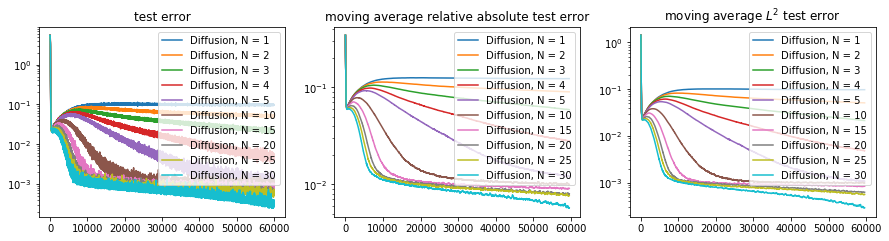

In [10]:
fig = plot_moving_average('Exponential on ball', models_05[:10])

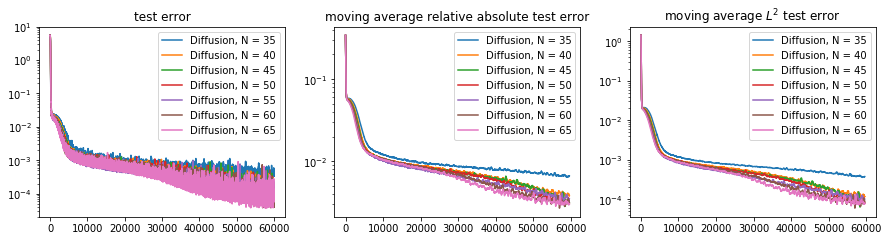

In [11]:
fig = plot_moving_average('Exponential on ball', models_05[10:17])

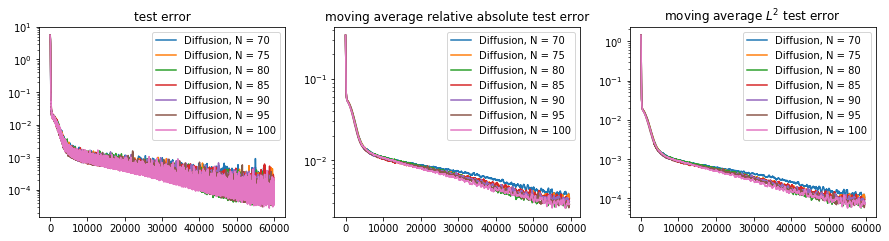

In [12]:
fig = plot_moving_average('Exponential on ball', models_05[17:])

In [13]:
test_losses_05 = []
test_losses_2_05 = []

for model in models_05:
    test_losses_05.append(np.mean(model.V_test_L2[-200:]))
    test_losses_2_05.append(np.mean(model.V_test_L2[-400:]))

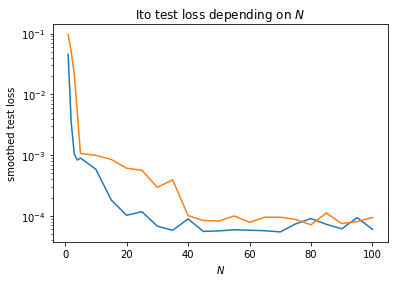

In [35]:
plt.title(r'Ito test loss depending on $N$')
plt.plot([model.N for model in models], test_losses);
plt.plot([model.N for model in models_05], test_losses_05);
#plt.plot(np.linspace(5, 100, 20), test_losses_2);
plt.yscale('log')
plt.xlabel(r'$N$');
plt.ylabel('smoothed test loss');

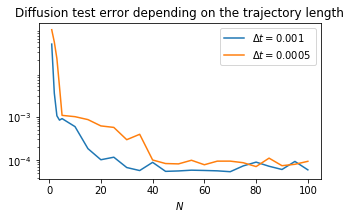

In [43]:
fig, ax = plt.subplots(1, 1, figsize=(5, 3.5))
#fig.suptitle(r'')

#ax[0].set_title(r'd = 5')
#ax[0].plot(np.concatenate([np.linspace(1, 4, 4), np.linspace(5, 50, 10)]), test_losses_d05, label=r'$\Delta t = 0.001$');
#ax[0].set_yscale('log')
#ax[0].set_xlabel(r'$N$');
#ax[0].legend()

ax.set_title(r'Diffusion test error depending on the trajectory length')
ax.plot([model.N for model in models], test_losses, label=r'$\Delta t = 0.001$');
ax.plot([model.N for model in models_05], test_losses_05, label=r'$\Delta t = 0.0005$');
#plt.plot(np.linspace(5, 100, 20), test_losses_2);
ax.set_yscale('log')
ax.set_xlabel(r'$N$');
ax.set_yticks([0.001, 0.0001])
ax.legend()
#plt.ylabel('smoothed test loss');

fig.tight_layout(rect=[0, 0.03, 1, 0.93])

#fig.savefig('img/error_trajectory_length_d10_weight_0_1.pdf')